# Underfitting vs. Overfitting
If you model understands the dependencies exactly 95-100% and draw a regression line on the observations, is it a perfect model? or if it generalises well (80-90%) and draws a regression line not on but around the observations?
Let's examine this with an example here.

In [ ]:
# print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import operator

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
np.random.seed(0)

In [ ]:
n_samples = 30

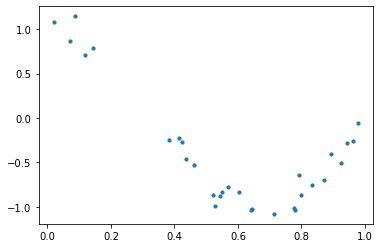

In [ ]:
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X,y, s=10)
plt.show()

In [ ]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [ ]:
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

In [ ]:
# plt.figure(figsize=(14, 5))

In [ ]:
X_test = np.linspace(0, 1, 30)

In [ ]:
X_test

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

In [ ]:
y_test = true_fun(X_test) + np.random.randn(n_samples) * 0.1

In [ ]:
y_test

array([ 0.94891949,  0.8687633 ,  0.94483495,  0.92634523,  0.80274479,
        0.71794665,  0.49775486,  0.38361498,  0.20028229,  0.0721637 ,
       -0.13545354, -0.3875987 , -0.35239554, -0.55573195, -0.81040612,
       -0.71588383, -0.94758701, -0.92378218, -0.9037115 , -0.98563512,
       -0.88019789, -1.08703257, -0.86734126, -0.89617001, -0.81307521,
       -0.66305918, -0.49956369, -0.313685  , -0.27829698,  0.09008265])

In [ ]:
# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]

In [ ]:
# transforming the data to include another axis
X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [ ]:
model_one_degree = LinearRegression()
model_one_degree.fit(X, y)
y_pred = model_one_degree.predict(X)

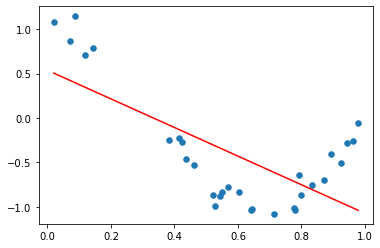

In [ ]:
plt.scatter(X, y, s=30)
plt.plot(X, y_pred, color='r')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print('RMSE DEGREE ONE:', rmse)
print('R2 DEGREE ONE:', r2)

RMSE DEGREE ONE: 0.4752813364545183
R2 DEGREE ONE: 0.4736796287494851


In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly_two = polynomial_features.fit_transform(X)

In [1]:
model_two_degree = LinearRegression()
model_two_degree.fit(x_poly_two, y)
y_poly_pred_two = model_two_degree.predict(x_poly_two)

NameError: ignored

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred_two))
r2 = r2_score(y,y_poly_pred_two)
print('RMSE DEGREE 2:', rmse)
print('R2 DEGREE 2:', r2)

RMSE DEGREE 2: 0.17233609641603986
R2 DEGREE 2: 0.93080078598832


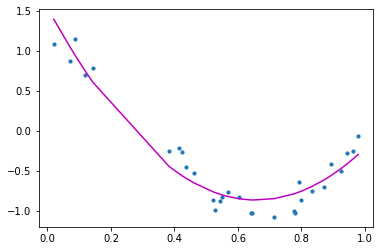

In [ ]:
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred_two), key=sort_axis)
X, y_poly_pred_two = zip(*sorted_zip)
plt.plot(X, y_poly_pred_two, color='m')
plt.show()

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly_three = polynomial_features.fit_transform(X)

In [2]:
model_three_degree = LinearRegression()
model_three_degree.fit(x_poly_three, y)
y_poly_pred_three = model_three_degree.predict(x_poly_three)

NameError: ignored

In [ ]:
rmse_three = np.sqrt(mean_squared_error(y,y_poly_pred_three))
r2_three = r2_score(y,y_poly_pred_three)
print('RMSE DEGREE 3', rmse_three)
print('R2 DEGREE 3', r2_three)

RMSE DEGREE 3 0.11172558895135497
R2 DEGREE 3 0.9709160115202458


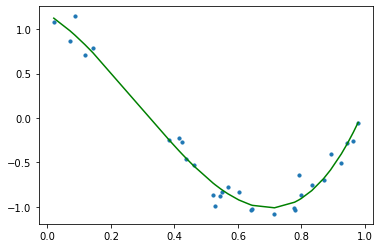

In [ ]:
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred_three), key=sort_axis)
X, y_poly_pred_three = zip(*sorted_zip)
plt.plot(X, y_poly_pred_three, color='g')
plt.show()

In [ ]:
polynomial_features= PolynomialFeatures(degree=20)
x_poly_twenty = polynomial_features.fit_transform(X)

In [ ]:
model_twenty_degree = LinearRegression()
model_twenty_degree.fit(x_poly_twenty, y)
y_poly_pred_twenty = model_twenty_degree.predict(x_poly_twenty)

In [ ]:
rmse_twenty = np.sqrt(mean_squared_error(y,y_poly_pred_twenty))
r2_twenty = r2_score(y,y_poly_pred_twenty)
print('RMSE TWENTY DEGREE', rmse_twenty)
print('R2 TWENTY DEGREE', r2_twenty)

RMSE TWENTY DEGREE 0.06718477256386042
R2 TWENTY DEGREE 0.9894830366321157


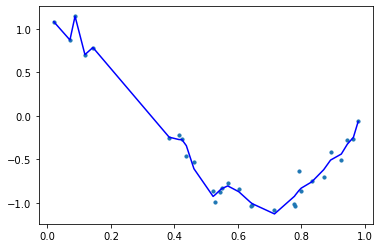

In [ ]:
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred_twenty), key=sort_axis)
X, y_poly_pred_twenty = zip(*sorted_zip)
plt.plot(X, y_poly_pred_twenty, color='b')
plt.show()

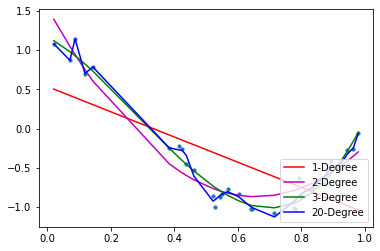

In [ ]:
plt.scatter(X, y, s=10)


# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
# x, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_pred, color='r', label='1-Degree')
plt.plot(X, y_poly_pred_two, color='m', label='2-Degree')
plt.plot(X, y_poly_pred_three, color='g', label='3-Degree')
plt.plot(X, y_poly_pred_twenty, color='b', label='20-Degree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_test = model_one_degree.predict(X_test)

In [ ]:
rmse_one_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
r2_one = r2_score(y_test,y_pred_test)
print('RMSE TEST DEGREE 1', rmse_one_test)
print('R2 TEST DEGREE 1', r2_one)

RMSE TEST DEGREE 1 0.45538670278847876
R2 TEST DEGREE 1 0.5532801157330136


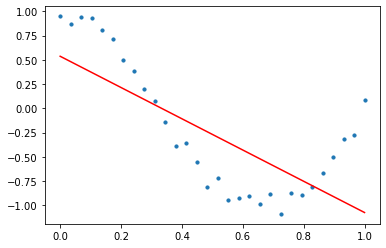

In [ ]:
plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_pred_test), key=sort_axis)
X_test, y_pred_test = zip(*sorted_zip)
plt.plot(X_test, y_pred_test, color='r')
plt.show()

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly_two_test = polynomial_features.fit_transform(X_test)

In [ ]:
y_poly_pred_two_test = model_two_degree.predict(x_poly_two_test)

In [ ]:
rmse_two_test = np.sqrt(mean_squared_error(y_test,y_poly_pred_two_test))
r2_two = r2_score(y_test,y_poly_pred_two_test)
print(rmse_two_test)
print(r2_two)

0.2060674799379676
0.9085268754909284


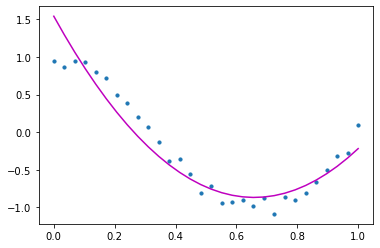

In [ ]:
plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred_two_test), key=sort_axis)
X_test, y_poly_pred_two_test = zip(*sorted_zip)
plt.plot(X_test, y_poly_pred_two_test, color='m')
plt.show()

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly_three_test = polynomial_features.fit_transform(X_test)

In [ ]:
y_poly_pred_three_test = model_three_degree.predict(x_poly_three_test)

In [ ]:
rmse_three_test = np.sqrt(mean_squared_error(y_test,y_poly_pred_three_test))
r2_three = r2_score(y_test,y_poly_pred_three_test)
print(rmse_three_test)
print(r2_three)

0.09467498444228502
0.9806916537326442


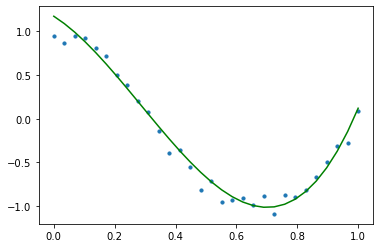

In [ ]:
plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred_three_test), key=sort_axis)
X_test, y_poly_pred_three_test = zip(*sorted_zip)
plt.plot(X_test, y_poly_pred_three_test, color='g')
plt.show()

In [ ]:
polynomial_features= PolynomialFeatures(degree=20)
x_poly_twenty_test = polynomial_features.fit_transform(X_test)

In [ ]:
y_poly_pred_twenty_test = model_twenty_degree.predict(x_poly_twenty_test)

In [ ]:
rmse_twenty_test = np.sqrt(mean_squared_error(y_test,y_poly_pred_twenty_test))
r2_twenty = r2_score(y_test,y_poly_pred_twenty_test)
print(rmse_twenty_test)
print(r2_twenty)

175.79087196238487
-66567.26448173056


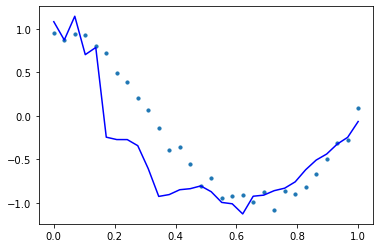

In [ ]:
plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred_twenty), key=sort_axis)
X_test, y_poly_pred_twenty = zip(*sorted_zip)
plt.plot(X_test, y_poly_pred_twenty, color='b')
plt.show()